In [1]:
import pandas as pd

file = "dataset_csv.csv"

In [4]:
df = pd.read_csv (
    file, sep=";", names=["absolute path", "relative path", "class name"]
)
df = df.drop(["relative path"], axis=1)

df

,absolute path,class name
0,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat
1,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat
2,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat
3,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat
4,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat
...,...,...
2322,C:\Users\sgold\VS Code projects\dataset\dog\14...,dog
2323,C:\Users\sgold\VS Code projects\dataset\dog\14...,dog
2324,C:\Users\sgold\VS Code projects\dataset\dog\14...,dog
2325,C:\Users\sgold\VS Code projects\dataset\dog\14...,dog


In [5]:
def new(row):
    if row["class name"] == "cat":
        val = 0
    else:
        val = 1
    return val


df["mark"] = df.apply(new, axis = 1)

df

,absolute path,class name,mark
0,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat,0
1,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat,0
2,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat,0
3,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat,0
4,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat,0
...,...,...,...
2322,C:\Users\sgold\VS Code projects\dataset\dog\14...,dog,1
2323,C:\Users\sgold\VS Code projects\dataset\dog\14...,dog,1
2324,C:\Users\sgold\VS Code projects\dataset\dog\14...,dog,1
2325,C:\Users\sgold\VS Code projects\dataset\dog\14...,dog,1


In [2]:
import cv2

In [6]:
def height(row):
    image = cv2.imread(row["absolute path"])
    value = image.shape
    
    return value[0]

def width(row):
    image = cv2.imread(row["absolute path"])
    value = image.shape
    
    return value[1]

def depth(row):
    image = cv2.imread(row["absolute path"])
    value = image.shape
    
    return value[2]

df["height"] = df.apply(height, axis = 1)
df["width"] = df.apply(width, axis = 1)
df["depth"] = df.apply(depth, axis = 1)

df

,absolute path,class name,mark,height,width,depth
0,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat,0,320,382,3
1,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat,0,319,480,3
2,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat,0,300,480,3
3,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat,0,320,480,3
4,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat,0,320,480,3
...,...,...,...,...,...,...
2322,C:\Users\sgold\VS Code projects\dataset\dog\14...,dog,1,320,470,3
2323,C:\Users\sgold\VS Code projects\dataset\dog\14...,dog,1,320,320,3
2324,C:\Users\sgold\VS Code projects\dataset\dog\14...,dog,1,320,463,3
2325,C:\Users\sgold\VS Code projects\dataset\dog\14...,dog,1,300,480,3


In [7]:
df.describe()


,mark,height,width,depth
count,2327.000000,2327.000000,2327.000000,2327.0
mean,0.589600,310.744306,434.128492,3.0
std,0.492012,15.759708,76.113185,0.0
min,0.000000,240.000000,148.000000,3.0
25%,0.000000,300.000000,427.000000,3.0
50%,1.000000,320.000000,480.000000,3.0
75%,1.000000,320.000000,480.000000,3.0
max,1.000000,320.000000,480.000000,3.0


In [16]:
def filter_dataframe(df, label):
    copy_df = df[df.mark == label]
    return copy_df

filter_dataframe(df, 0)

,absolute path,class name,mark,height,width,depth,size,pixels
0,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat,0,320,382,3,366720,366720
1,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat,0,319,480,3,459360,459360
2,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat,0,300,480,3,432000,432000
3,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat,0,320,480,3,460800,460800
4,C:\Users\sgold\VS Code projects\dataset\cat\00...,cat,0,320,480,3,460800,460800
...,...,...,...,...,...,...,...,...
950,C:\Users\sgold\VS Code projects\dataset\cat\14...,cat,0,300,480,3,432000,432000
951,C:\Users\sgold\VS Code projects\dataset\cat\14...,cat,0,312,480,3,449280,449280
952,C:\Users\sgold\VS Code projects\dataset\cat\14...,cat,0,300,480,3,432000,432000
953,C:\Users\sgold\VS Code projects\dataset\cat\14...,cat,0,320,322,3,309120,309120


In [9]:
def max_dataframe(df, label, max_width, max_height):
    max_df = df[(df.mark == label) & (df.width <= max_width) & (df.height <= max_height)]
    return max_df

max_dataframe(df, 1, 400, 500)

,absolute path,class name,mark,height,width,depth
961,C:\Users\sgold\VS Code projects\dataset\dog\00...,dog,1,320,400,3
1010,C:\Users\sgold\VS Code projects\dataset\dog\00...,dog,1,320,240,3
1021,C:\Users\sgold\VS Code projects\dataset\dog\00...,dog,1,320,400,3
1061,C:\Users\sgold\VS Code projects\dataset\dog\01...,dog,1,320,213,3
1069,C:\Users\sgold\VS Code projects\dataset\dog\01...,dog,1,320,213,3
...,...,...,...,...,...,...
2315,C:\Users\sgold\VS Code projects\dataset\dog\14...,dog,1,320,288,3
2316,C:\Users\sgold\VS Code projects\dataset\dog\14...,dog,1,320,320,3
2320,C:\Users\sgold\VS Code projects\dataset\dog\14...,dog,1,320,256,3
2323,C:\Users\sgold\VS Code projects\dataset\dog\14...,dog,1,320,320,3


In [12]:
df["pixels"] = df["height"] * df["width"] * df["depth"]
result = df.groupby("mark").agg({"pixels": ["mean", "min", "max"]})
result

pixels                
               mean     min     max
mark                               
0     401328.251309  172800  460800
1     404901.690962  142080  460800

In [17]:
def histogram(df, label):
    array1 = []
    array2 = []
    array3 = []
    hg_df = filter_dataframe(df, label)
    for i in df.index:
        image = cv2.imread(df["absolute path"].loc[df.index[i]])
        array1.append(cv2.calcHist([image], [0], None, [256], [0, 256]))
        array2.append(cv2.calcHist([image], [1], None, [256], [0, 256]))
        array3.append(cv2.calcHist([image], [2], None, [256], [0, 256]))
    return array1, array2, array3

array1, array2, array3 = histogram(df, 0)

In [14]:
import matplotlib.pyplot as plt
import random

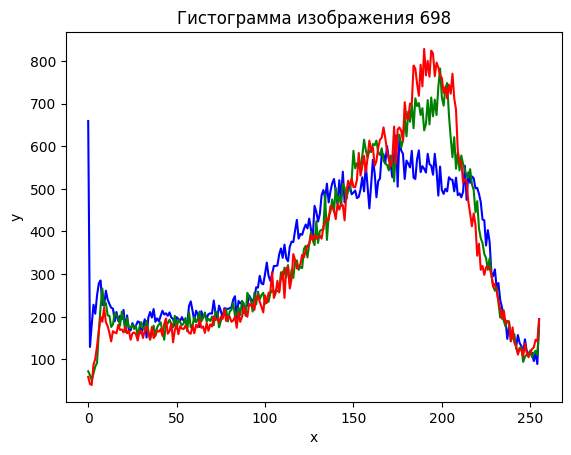

In [36]:
i = random.randint(0, 955)
a = str(i)
plt.ylabel('y')
plt.xlabel('x')
plt.plot(array1[i], color="b")
plt.plot(array2[i], color="g")
plt.plot(array3[i], color="r")
plt.title("Гистограмма изображения " + a)
plt.show()